In [1]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=true)

t1,t2,t3,t4,t5,t6,l1,l2,l3,d1,d2,d3,d4,d5,d6,l1,l2,l3 = symbols('\\theta_1, \\theta_2, \\theta_3, \\theta_4, \\theta_5, \\theta_6, l_1,l_2,l_3,d_1,d_2,d_3,d_4,d_5,d_6,l_1,l_2,l_3')
x,y,z = symbols('x,y,z')

def dhs(a,alpha,d,theta):
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

class Manipulator(object):
    def __init__(self,*args):
        self.Ts = []
        self.type = []
        for k in args:
            self.Ts.append(dhs(k[0],k[1],k[2],k[3]))
            if len(k)>4:
                self.type.append(k[4])
            else:
                self.type.append('r')
        self.dof = len(args)
    
    def z(self,i):
        if i == 0: return Matrix([[0],[0],[1]])
        MTH = eye(4)
        for k in range(i):
            MTH = MTH*self.Ts[k]
        return MTH[:3,2]
    
    def p(self,i):
        if i == 0: return Matrix([[0],[0],[0]])
        MTH = eye(4)
        for k in range(i):
            MTH = MTH*self.Ts[k]
        return MTH[:3,3]
    
    @property
    def J(self):
        n = self.dof
        M_ = zeros(6,n)
        for i in range(self.dof):
            if self.type[i]=='r':
                jp = self.z(i).cross(self.p(n) - self.p(i))
                jo = self.z(i)
            else:
                jp = self.z(i)
                jo = zeros(3,1)
            jp = jp.col_join(jo)
            M_[:,i] = jp
        return M_


## Manipulador PPR

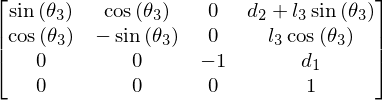

In [3]:
import operator, functools
PPR = Manipulator((0,pi/2,d1,pi/2,'p'),(0,pi/2,d2,0,'p'),(l3,0,0,t3,'r'))
TPPR = functools.reduce(operator.mul, PPR.Ts)
TPPR

### Cinemática inversa

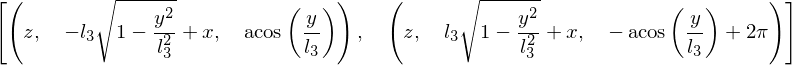

In [3]:
xx,yy,zz = TPPR[0,3],TPPR[1,3],TPPR[2,3]
simplify(solve([Eq(zz,z),Eq(xx,x),Eq(yy,y)],[d1,d2,t3]))

### Matriz jacobiana

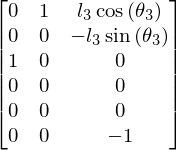

In [4]:
JPPR = PPR.J
JPPR

In [5]:
d1p, d2p, t3p = 200,200,1.5
JN = JPPR.subs({t3:pi/6,l3:200})
VW = (JN*Matrix([[d1p],[d2p],[t3p]])).evalf()
v = sqrt(VW[0]**2+ VW[1]**2 + VW[2]**2)
w = sqrt(VW[3]**2+ VW[4]**2 + VW[5]**2)
v,w

# PUMA 560 

In [6]:
PUMA560 = Manipulator((0,-pi/2,0,t1),(l2,0,d2,t2),(0,pi/2,0,t3),(0,-pi/2,d4,t4),(0,pi/2,0,t5),(0,0,d6,t6))

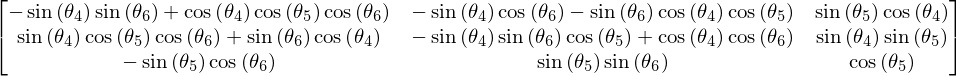

In [7]:
T63 = PUMA560.Ts[3]*PUMA560.Ts[4]*PUMA560.Ts[5]
T30 = PUMA560.Ts[0]*PUMA560.Ts[1]*PUMA560.Ts[2]
R63 = T63[:3,:3]
simplify(R63)

In [8]:
Tm = T30*PUMA560.Ts[3]
pmx,pmy,pmz = Tm[0,3], Tm[1,3], Tm[2,3]

In [9]:
simplify(Eq(x**2 + y**2 + z**2, pmx**2 + pmy**2 + pmz**2))

In [10]:
pmx,pmy,pmz

In [19]:
sxy = symbols('s_{xy}')
eq1 = d2*sin(t1) + sxy*cos(t1)
eq2 = -d2*cos(t1) + sxy*sin(t1)

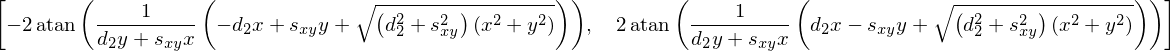

In [29]:
solve(Eq(simplify(eq2/eq1),x/y),t1)